 **Perceptron Model in Machine Learning**

**Perceptron is a machine-based technique used for supervised learning of different binary sorting tasks.**

**Based on the idea of a simple computational unit that receives one or more inputs and outputs a single result, the perceptron was created to resemble the structure and operation of neuron in the brain. In order to increase its accuracy in identifying new cases, the perceptron was built with the capacity to learn from examples and modify its parameters.**



# Question 1

*(a) We mentioned that perceptron converges if the data is linearly separable. Try sklearn perceptron model for versicolor and virginica, with sepal length and petal length. What do you observe?*

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Load Iris dataset
df = pd.read_csv("iris_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Printing count of different Species
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# Keeping only rows corresponding to versicolor and virginica species
df = df[50:150]
display(df)

# Separate data based on species for plotting
df_versicolor = df[df.species == "versicolor"]
df_virginica = df[df.species == "virginica"]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


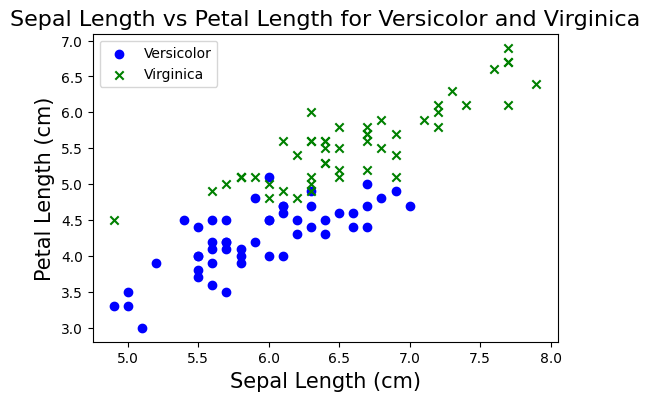

In [ ]:
# Create a scatter plot for visual inspection of the data
plt.figure(figsize=(6, 4))
plt.scatter(df_versicolor.sepal_length, df_versicolor.petal_length, color="blue", marker='o', label="Versicolor")
plt.scatter(df_virginica.sepal_length, df_virginica.petal_length, color="green", marker='x', label="Virginica")
plt.title("Sepal Length vs Petal Length for Versicolor and Virginica", fontsize=16)
plt.xlabel("Sepal Length (cm)", fontsize=15)
plt.ylabel("Petal Length (cm)", fontsize=15)
plt.legend()
plt.show()

**It is clear from the scatter plot above that the two input variables under consideration cannot be separated linearly.Due to their overlap, Versicolour and Virginica cannot be separated linearly.**

In [ ]:
# Features: Sepal length and Petal length
X = df[["sepal_length", "petal_length"]]
X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


**Labels for virginica and versicolour are converted to numerical values: "versicolour to -1" and "virginica to 1."**

In [ ]:
# Store the labels in y
y = df['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# versicolor = -1 , virginica = 1

y = np.where(y == 'versicolor', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Executing the model derived from the Sklearn Perceptron model.

In [ ]:
#Import Perceptron from sklearn
from sklearn.linear_model import Perceptron

In [ ]:
#Making an instance of Perceptron class
clf = Perceptron()
#Fit the model to the training data
clf.fit(X,y)

Perceptron()

In [ ]:
#Compute predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [ ]:
#Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Comparing predicted labels and actual labels
print(y_pred == y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


**There are 20 records that do not indicate the intended result.**


In [ ]:
clf.coef_   # weights

array([[-56.5,  74.9]])

In [ ]:
clf.intercept_  # bias

array([-38.])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


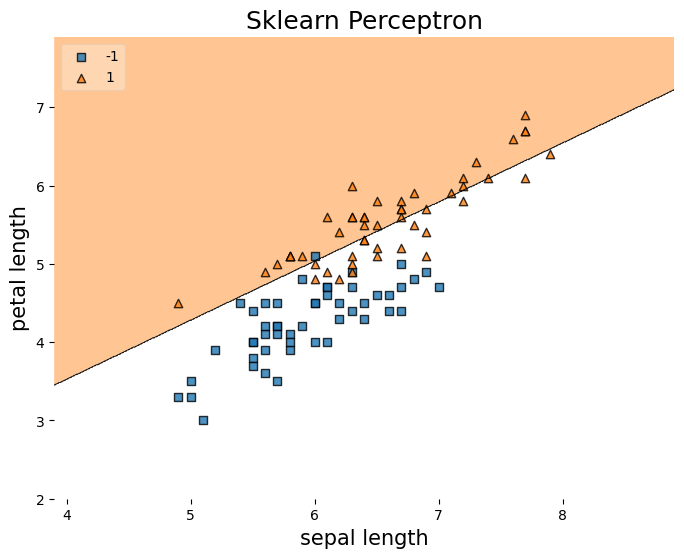

In [ ]:
# Ploting decision boundaries to visualize model's performance
plt.figure(figsize = (8, 6))
plot_decision_regions(X.to_numpy(), y, clf = clf,legend=2)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("petal length", fontsize = 15);

**The scatter plot indicates that a small number of samples are not being accurately identified.**

In [ ]:
# Evaluating the model's performance using confusion matrix and accuracy score
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, y_pred)
accuracy = metrics.accuracy_score(y, y_pred)

print("Confusion Matrix:\n", confusion_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
 [[49  1]
 [19 31]]
Accuracy: 80.00%


**Observation:**  

**According to the confusion matrix, 31 samples are classified as Virginica (True Negative) while 49 samples are classified as Versicolour (True Positive). The model indicates that these classifications are correct.On the other hand, 19 samples—which are false negatives—are falsely classed as virginica, while 1 sample—a false positive—is falsely classified as versicolour.**

**We have an 80% accuracy rate with our machine learning model.**

# Question 2

*(b) We created My_Perceptron class for only 2 inputs. Extend this code for 3 inputs. Investigate the iris data set and choose 3 features to classify setosa and versicolor using your code. Notice that you cannot easily plot the decision boundary now since the data is 3-dimensional, but you can still compare the actual and the predicted labels to see how your algorithm is performing.*

In [ ]:
# Load Iris dataset
df = pd.read_csv("iris_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Removing last 50 rows as we only need setosa and versicolor
df = df.iloc[:100]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


**Sepal width is choosen as the third feature to categorise Setosa and versicolour.**



In [ ]:
# Converting input features to numpy array

X = df[['sepal_length','petal_length','sepal_width']].to_numpy()
X

array([[5.1, 1.4, 3.5],
       [4.9, 1.4, 3. ],
       [4.7, 1.3, 3.2],
       [4.6, 1.5, 3.1],
       [5. , 1.4, 3.6],
       [5.4, 1.7, 3.9],
       [4.6, 1.4, 3.4],
       [5. , 1.5, 3.4],
       [4.4, 1.4, 2.9],
       [4.9, 1.5, 3.1],
       [5.4, 1.5, 3.7],
       [4.8, 1.6, 3.4],
       [4.8, 1.4, 3. ],
       [4.3, 1.1, 3. ],
       [5.8, 1.2, 4. ],
       [5.7, 1.5, 4.4],
       [5.4, 1.3, 3.9],
       [5.1, 1.4, 3.5],
       [5.7, 1.7, 3.8],
       [5.1, 1.5, 3.8],
       [5.4, 1.7, 3.4],
       [5.1, 1.5, 3.7],
       [4.6, 1. , 3.6],
       [5.1, 1.7, 3.3],
       [4.8, 1.9, 3.4],
       [5. , 1.6, 3. ],
       [5. , 1.6, 3.4],
       [5.2, 1.5, 3.5],
       [5.2, 1.4, 3.4],
       [4.7, 1.6, 3.2],
       [4.8, 1.6, 3.1],
       [5.4, 1.5, 3.4],
       [5.2, 1.5, 4.1],
       [5.5, 1.4, 4.2],
       [4.9, 1.5, 3.1],
       [5. , 1.2, 3.2],
       [5.5, 1.3, 3.5],
       [4.9, 1.5, 3.1],
       [4.4, 1.3, 3. ],
       [5.1, 1.5, 3.4],
       [5. , 1.3, 3.5],
       [4.5, 1.3

<ipython-input-59-072d089bd623>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df1.sepal_length, df1.petal_length,df1.sepal_width, color="blue",marker='o',cmap="jet", label="versicolor")
<ipython-input-59-072d089bd623>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(df2.sepal_length, df2.petal_length,df1.sepal_width, color="green", marker='x',cmap="jet",label="setosa")


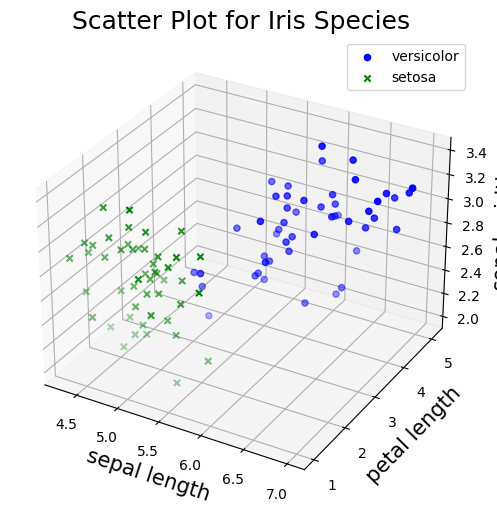

In [ ]:
from mpl_toolkits import mplot3d
df1 = df[df.species=="versicolor"]
df2 = df[df.species=="setosa"]
plt.figure(figsize = (6, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(df1.sepal_length, df1.petal_length,df1.sepal_width, color="blue",marker='o',cmap="jet", label="versicolor")
ax.scatter3D(df2.sepal_length, df2.petal_length,df1.sepal_width, color="green", marker='x',cmap="jet",label="setosa")
plt.title("Scatter Plot for Iris Species", fontsize = 18)
ax.set_xlabel("sepal length", fontsize=15)
ax.set_ylabel("petal length", fontsize=15)
ax.set_zlabel("sepal_width",fontsize=15)
plt.legend();

**The above plotted graph is to seperate versicolor and setosa by taking three input variables sepal length,petal length an sepal width.**

In [ ]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1)
        self.b = np.random.rand(1)

        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.w3 = self.w3 - update*xi[2]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)

        return self

    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2,self.w3])
        return np.dot(x, self.w) + self.b

    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [ ]:
# Instantiate one instance of My_Perceptron class
my_clf = MyPerceptron()

# Call the fit method
my_clf.fit(X, y)

<ipython-input-60-b2b36830da13>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


In [ ]:
#changing the labels of setosa and versicolor as setosa = -1 and versicolor = 1
y = df['species']
y= np.where(y == "setosa", -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Predicted labels
y_pred = my_clf.predict(X)
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]



**All samples are getting classified accurately.**

In [ ]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
confusion_matrix

array([[50,  0],
       [ 0, 50]])

In [ ]:
accuracy= metrics.accuracy_score(y_pred,y)
accuracy

1.0

Text(0.5, 0.98, 'My Perceptron Classifier')

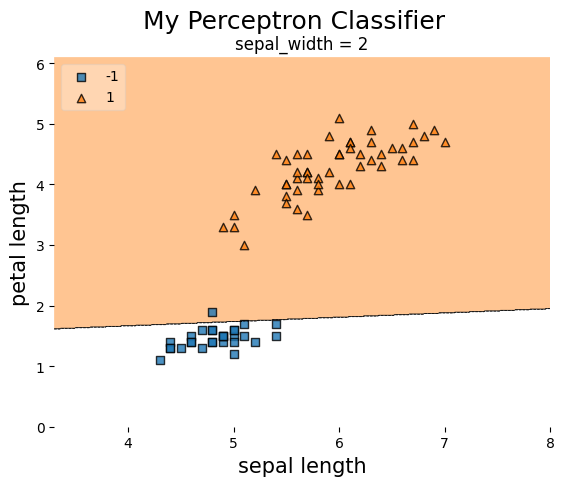

<Figure size 600x600 with 0 Axes>

In [ ]:
value = 2
width = 1.5
fig,ax=plt.subplots()
plt.figure(figsize = (6, 6))
plot_decision_regions(X, y, clf = my_clf,filler_feature_values={2: value},filler_feature_ranges={2: width},legend=2, ax=ax)
ax.set_xlabel("sepal length", fontsize = 15)
ax.set_ylabel("petal length", fontsize = 15)
ax.set_title('sepal_width = {}'.format(value))
fig.suptitle("My Perceptron Classifier", fontsize = 18)

**This is the decision boundry plot taking sepal length in the X axis and Petal length in the Y axis. Here we can't take Z axis instead we gave a range for the third variable which is sepal_width. Sepal_width range is from 1 to 2 so we took a range from 0.5 to 2.5 for the plotting. From the above plot we created a boundry/plane which seperats Setosa and Versicolor for all the records.**

In [ ]:
my_clf.errors

[2, 2, 1]

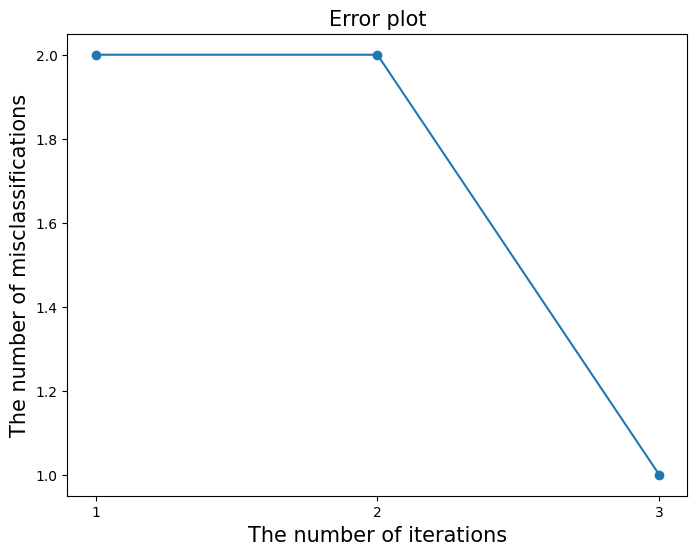

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(my_clf.errors)+1), my_clf.errors,marker = "o")
plt.title("Error plot", fontsize = 15)
plt.xlabel("The number of iterations", fontsize = 15)
plt.ylabel("The number of misclassifications", fontsize = 15)
plt.xticks(range(1, len(my_clf.errors)+1))
plt.show()

# Question 3

*(c) Try to generalize My_Perceptron code so it could be used for any number of inputs. (Hint: Recall, that for a list w we can use w[-1] and w[:-1] to access the last value in the list and all the values expect the very last value. Also, use np.dot, NumPy dot product, to compute the pre-activation value of  z .)*

In [ ]:
df=pd.read_csv("iris_dataset.csv")
df=df[:100]

In [ ]:
class MyPerceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):
        self.w=[]
        self.b=np.random.rand(1)
        for _ in range(len(X[0])):
            self.w.append(np.random.rand(1))
        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                for i in range(len(xi)):
                    self.w[i]-=update*xi[i]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)

        return self

    def weighted_sum(self, x):
        return np.dot(x, self.w) + self.b

    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)

In [ ]:
# Instantiate one instance of My_Perceptron class
clf2 = MyPerceptron()

# Call the fit method
clf2.fit(X, y)

<ipython-input-71-e450a42bf2ff>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


In [ ]:
# Predict labels on X
y_pred = clf2.predict(X)
y_pred = y_pred.reshape(100)
y_pred==y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, y_pred)
accuracy = metrics.accuracy_score(y, y_pred)

print("Confusion Matrix:\n", confusion_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[50  0]
 [ 0 50]]
Accuracy: 100.00%
